### Introduction

In this file we use the result of *"Data Preparation"* notebook. I calculated two parameters: Mean Invoice Value and Purchase Frequency which will be base for clustering. Two parameters are not a large set but we can make plot of them to better understand the results.

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("data_for_KML.pkl")
df.head()

,MeanInvoice,PurchFreq
CustomerID,,
12347.0,615.714286,0.019074
12348.0,449.310000,0.011173
12349.0,1757.550000,0.052632
12350.0,334.400000,0.003226
12352.0,309.082000,0.016835


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4032 entries, 12347.0 to 18287.0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MeanInvoice  4032 non-null   float64
 1   PurchFreq    4032 non-null   float64
dtypes: float64(2)
memory usage: 94.5 KB


# Machine Learning - Cluster Analysis

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Data standardisation and visualisation

In [5]:
scaler = StandardScaler()
features = scaler.fit_transform(df)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

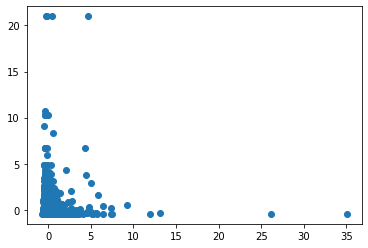

In [7]:
plt.scatter(features[:,0],features[:,1])

## Clusterisation K Means Method 

In [8]:
cluster = KMeans(n_clusters = 8,random_state=0)

In [9]:
model = cluster.fit(features)

Numbers of customers in the cluster and scatter plot showing splitting data into clusters.

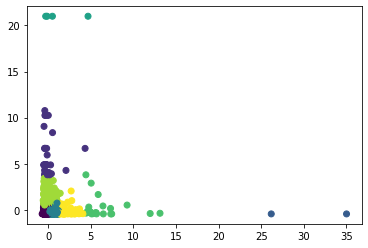

In [10]:
plt.scatter(features[:,0],features[:,1], c=model.labels_)

In [11]:
pd.Series(model.labels_).value_counts()

0    2725
3     725
6     397
7     122
1      34
5      23
4       4
2       2
dtype: int64

In [12]:
model.inertia_

927.8175332142065

### Elbow method analysis

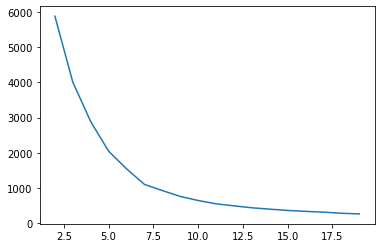

In [13]:
n, error = [], []
for i in range(2,20):
    cluster_temp = KMeans(n_clusters = i)
    model_tmp = cluster_temp.fit(features)
    error.append(model_tmp.inertia_)
    n.append(i)
    
plt.plot(n, error)

This is always an arbitrary decision and the number of clusters equal to 8 seems to be a right choice. One can also understand a business layer of the problem

### Business Value Cluster Analysis

Below we try to go back to the raw data and analyse clusters looking at our two parameters frequency of purchase and mean invoice value. We calculate those for each cluster:

In [14]:
# assigning cluster to the points

df["Cluster"] = model.labels_
cluster_temp = df.reset_index().drop(["CustomerID"],axis=1)
cluster_temp.head()

,MeanInvoice,PurchFreq,Cluster
0,615.714286,0.019074,3
1,449.310000,0.011173,0
2,1757.550000,0.052632,7
3,334.400000,0.003226,0
4,309.082000,0.016835,0


In [15]:
cl_mean = cluster_temp.groupby(["Cluster"]).mean()
cl_mean["CustNumber"] = cluster_temp["Cluster"].value_counts()
cl_mean

,MeanInvoice,PurchFreq,CustNumber
Cluster,,,
0,260.067343,0.013951,2725
1,442.978992,0.300621,34
2,24494.245000,0.002725,2
3,794.967680,0.014626,725
4,1391.793333,1.000000,4
5,5415.456669,0.031649,23
6,352.556727,0.070891,397
7,2048.323498,0.013852,122


In [16]:
cl_mean.sort_values(by="MeanInvoice",ascending=False)

,MeanInvoice,PurchFreq,CustNumber
Cluster,,,
2,24494.245000,0.002725,2
5,5415.456669,0.031649,23
7,2048.323498,0.013852,122
4,1391.793333,1.000000,4
3,794.967680,0.014626,725
1,442.978992,0.300621,34
6,352.556727,0.070891,397
0,260.067343,0.013951,2725


In [17]:
cl_mean.sort_values(by="PurchFreq",ascending=False)

,MeanInvoice,PurchFreq,CustNumber
Cluster,,,
4,1391.793333,1.000000,4
1,442.978992,0.300621,34
6,352.556727,0.070891,397
5,5415.456669,0.031649,23
3,794.967680,0.014626,725
0,260.067343,0.013951,2725
7,2048.323498,0.013852,122
2,24494.245000,0.002725,2


So, this is a really rough approach since we do not have deep insight into whole business process. But some interesting points can be observed. The cluster 0 is most popular: clients with low and rare purchases. The clusters 4, 5 and 2 seem to be outliers men definitely cluster two we can tread as very valuable clients.

The very interesting are clusters 3 and 6. "6" make purchase very often and "3" spend much money. Definitely they should be a target for any marketing campaigns.


<AxesSubplot:xlabel='Cluster'>

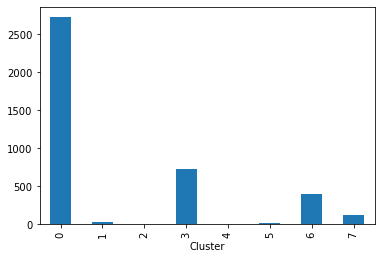

In [18]:
cl_mean["CustNumber"].plot.bar()

<AxesSubplot:xlabel='Cluster'>

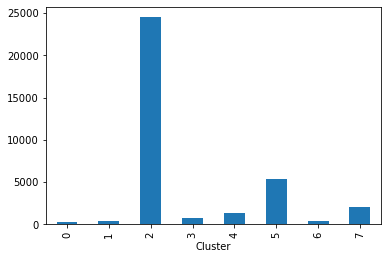

In [19]:
cl_mean["MeanInvoice"].plot.bar()

<AxesSubplot:xlabel='Cluster'>

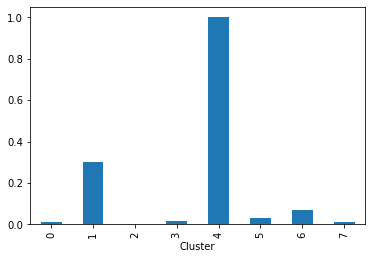

In [20]:
cl_mean["PurchFreq"].plot.bar()

### Normalised segmentation

One can also multiply all columns to calculate total income from different clusters. Bun one thing is important - we calculated frequency calculating time of being client. We assume that all the future purchase will be done with that frequency.

In [21]:
cl_mean["Total"] = cl_mean["MeanInvoice"] * cl_mean["PurchFreq"] * cl_mean["CustNumber"]
cl_mean

,MeanInvoice,PurchFreq,CustNumber,Total
Cluster,,,,
0,260.067343,0.013951,2725,9886.817785
1,442.978992,0.300621,34,4527.738066
2,24494.245000,0.002725,2,133.499483
3,794.967680,0.014626,725,8429.904223
4,1391.793333,1.000000,4,5567.173333
5,5415.456669,0.031649,23,3942.118632
6,352.556727,0.070891,397,9922.267325
7,2048.323498,0.013852,122,3461.502427


<AxesSubplot:xlabel='Cluster'>

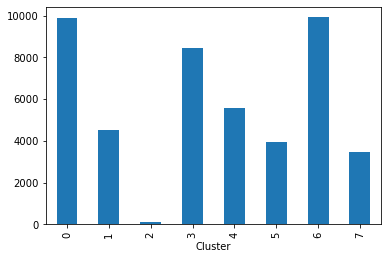

In [22]:
cl_mean["Total"].plot.bar()

Although clusters "3" and "6" are much smaller they generate similar income as large cluster "0".